# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=60)
lngs = np.random.uniform(low=-180.000, high=180.000, size=60)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

    

53

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create a dataframe to store all the cities and countries generated with citipy
df_countries = pd.DataFrame({'City': cities})

#add additional blank columns to store information from openweathermap api
df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Max Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''
df_countries['Date'] = ''

#base url
weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

#loop through all rows and fill in values for blank columns in dataframe
for index,row in df_countries.iterrows(): 
    # Get json respose for each city
    response = requests.get(weather_url+row['City']).json() 
    
    #adding response data to respective columns
    df_countries.loc[index,'Latitude'] = response.get("coord", {}).get("lat", "unknown")
    df_countries.loc[index,'Longitude'] = response.get("coord", {}).get("lon", "unknown")
    df_countries.loc[index,'Max Temperature (F)'] = response.get("main", {}).get("temp_max", "unknown")
    df_countries.loc[index,'Humidity (%)'] = response.get("main", {}).get("humidity", "unknown")
    df_countries.loc[index,'Cloudiness (%)'] = response.get('clouds', {}).get('all', 'unknown')
    df_countries.loc[index,'Wind Speed (mph)'] = response.get("wind", {}).get("speed", "unknown")
    df_countries.loc[index, 'Date'] = response.get("dt", "unknown")
    
    #print results
    print(f'Processing City: {row[0]}, City Number: {index}')
    


Processing City: leningradskiy, City Number: 0
Processing City: rikitea, City Number: 1
Processing City: nanortalik, City Number: 2
Processing City: fortuna, City Number: 3
Processing City: katsuura, City Number: 4
Processing City: stamsund, City Number: 5
Processing City: kaeo, City Number: 6
Processing City: bargal, City Number: 7
Processing City: ilebo, City Number: 8
Processing City: feijo, City Number: 9
Processing City: busselton, City Number: 10
Processing City: pevek, City Number: 11
Processing City: kapustin yar, City Number: 12
Processing City: kendari, City Number: 13
Processing City: saint-philippe, City Number: 14
Processing City: new norfolk, City Number: 15
Processing City: barentsburg, City Number: 16
Processing City: souillac, City Number: 17
Processing City: saedinenie, City Number: 18
Processing City: punta arenas, City Number: 19
Processing City: jamestown, City Number: 20
Processing City: severo-kurilsk, City Number: 21
Processing City: warqla, City Number: 22
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Get names of indexes for which the row values are unknown
index_unknowns = df_countries[ df_countries['Latitude'] == 'unknown' ].index
 
# Delete these row indexes from dataFrame
df_countries.drop(index_unknowns , inplace=True) 

#export cleaned df to csv
df_countries.to_csv('output_data/cities.csv')

In [6]:
#displayed clean df
df_countries

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,leningradskiy,69.38,178.42,-15.41,96,100,8.81,1580409727
1,rikitea,-23.12,-134.97,79.59,75,100,13.87,1580409727
2,nanortalik,60.14,-45.24,17.91,60,0,27.47,1580409727
3,fortuna,40.6,-124.16,55,100,75,4.7,1580409727
4,katsuura,35.13,140.3,50,61,75,18.34,1580409727
6,kaeo,-35.1,173.78,63,100,1,3.27,1580409727
8,ilebo,-4.32,20.58,72.73,94,88,3.06,1580409728
9,feijo,-8.16,-70.35,82.44,84,96,4.14,1580409728
10,busselton,-33.65,115.33,48.99,52,0,7.9,1580409728
11,pevek,69.7,170.31,-16.69,98,100,0.72,1580409728


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

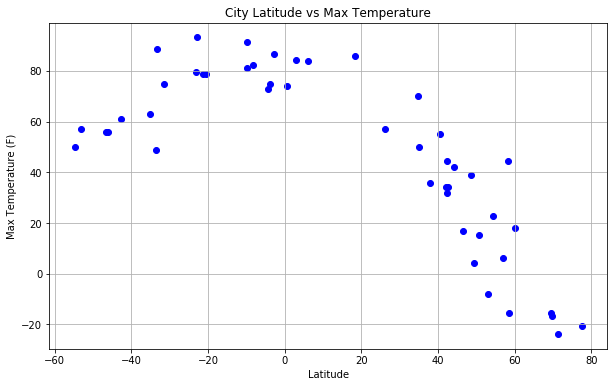

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Max Temperature (F)"], color='b')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

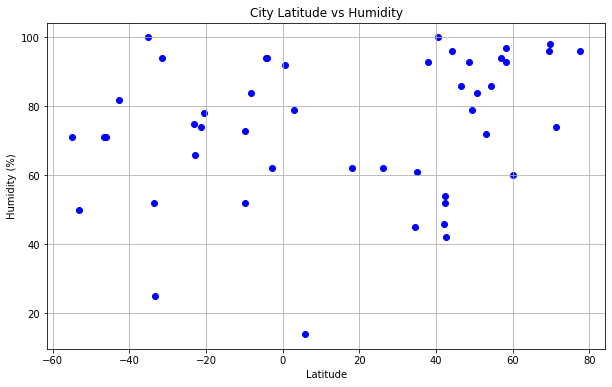

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Humidity (%)"], color='b')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

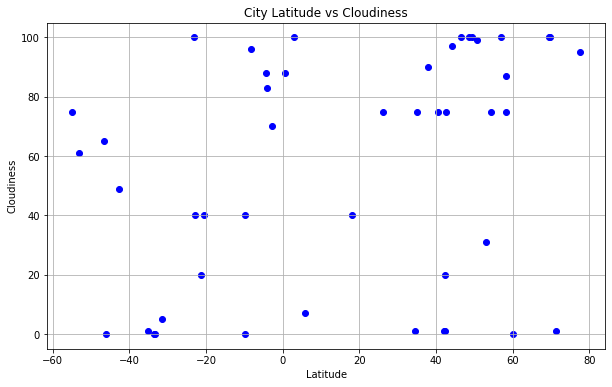

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Cloudiness (%)"], color='b')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

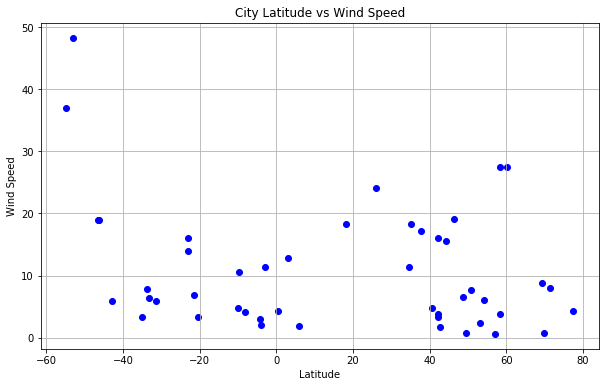

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Wind Speed (mph)"], color='b')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
#skipping this is im already behind and turning it late

In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression